# Traffic Sign Detection using YOLO

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies
%cd /content/yolov5

In [3]:
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.13.1+cu116 CPU


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5iEhRBsx7ftLJLyjpsXq")
project = rf.workspace("wids").project("traffic-sign-detection-pahbn")
dataset = project.version(4).download("yolov5")

In [5]:
%cat /content/yolov5/Traffic-Sign-Detection-4/data.yaml

names:
- danger
- mandatory
- other
- prohibitory
nc: 4
roboflow:
  license: CC BY 4.0
  project: traffic-sign-detection-pahbn
  url: https://universe.roboflow.com/wids/traffic-sign-detection-pahbn/dataset/4
  version: 4
  workspace: wids
test: ../test/images
train: Traffic-Sign-Detection-4/train/images
val: Traffic-Sign-Detection-4/valid/images


In [6]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [7]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --cfg ./models/yolov5n.yaml --weights '' --name yolov5s_results  --cache

In [9]:
# # Start tensorboard
# # Launch after you have started training
# # logs save in the folder "runs"
# %load_ext tensorboard
# %tensorboard --logdir runs

Summary for each class during training


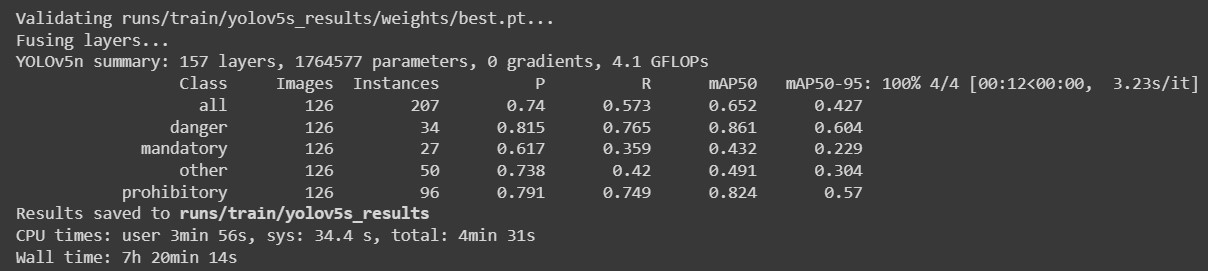

In [23]:
#Summary for each class
print("Summary for each class during training")
Image(filename='/content/Summary.jpg', width=900)

GROUND TRUTH DATA:


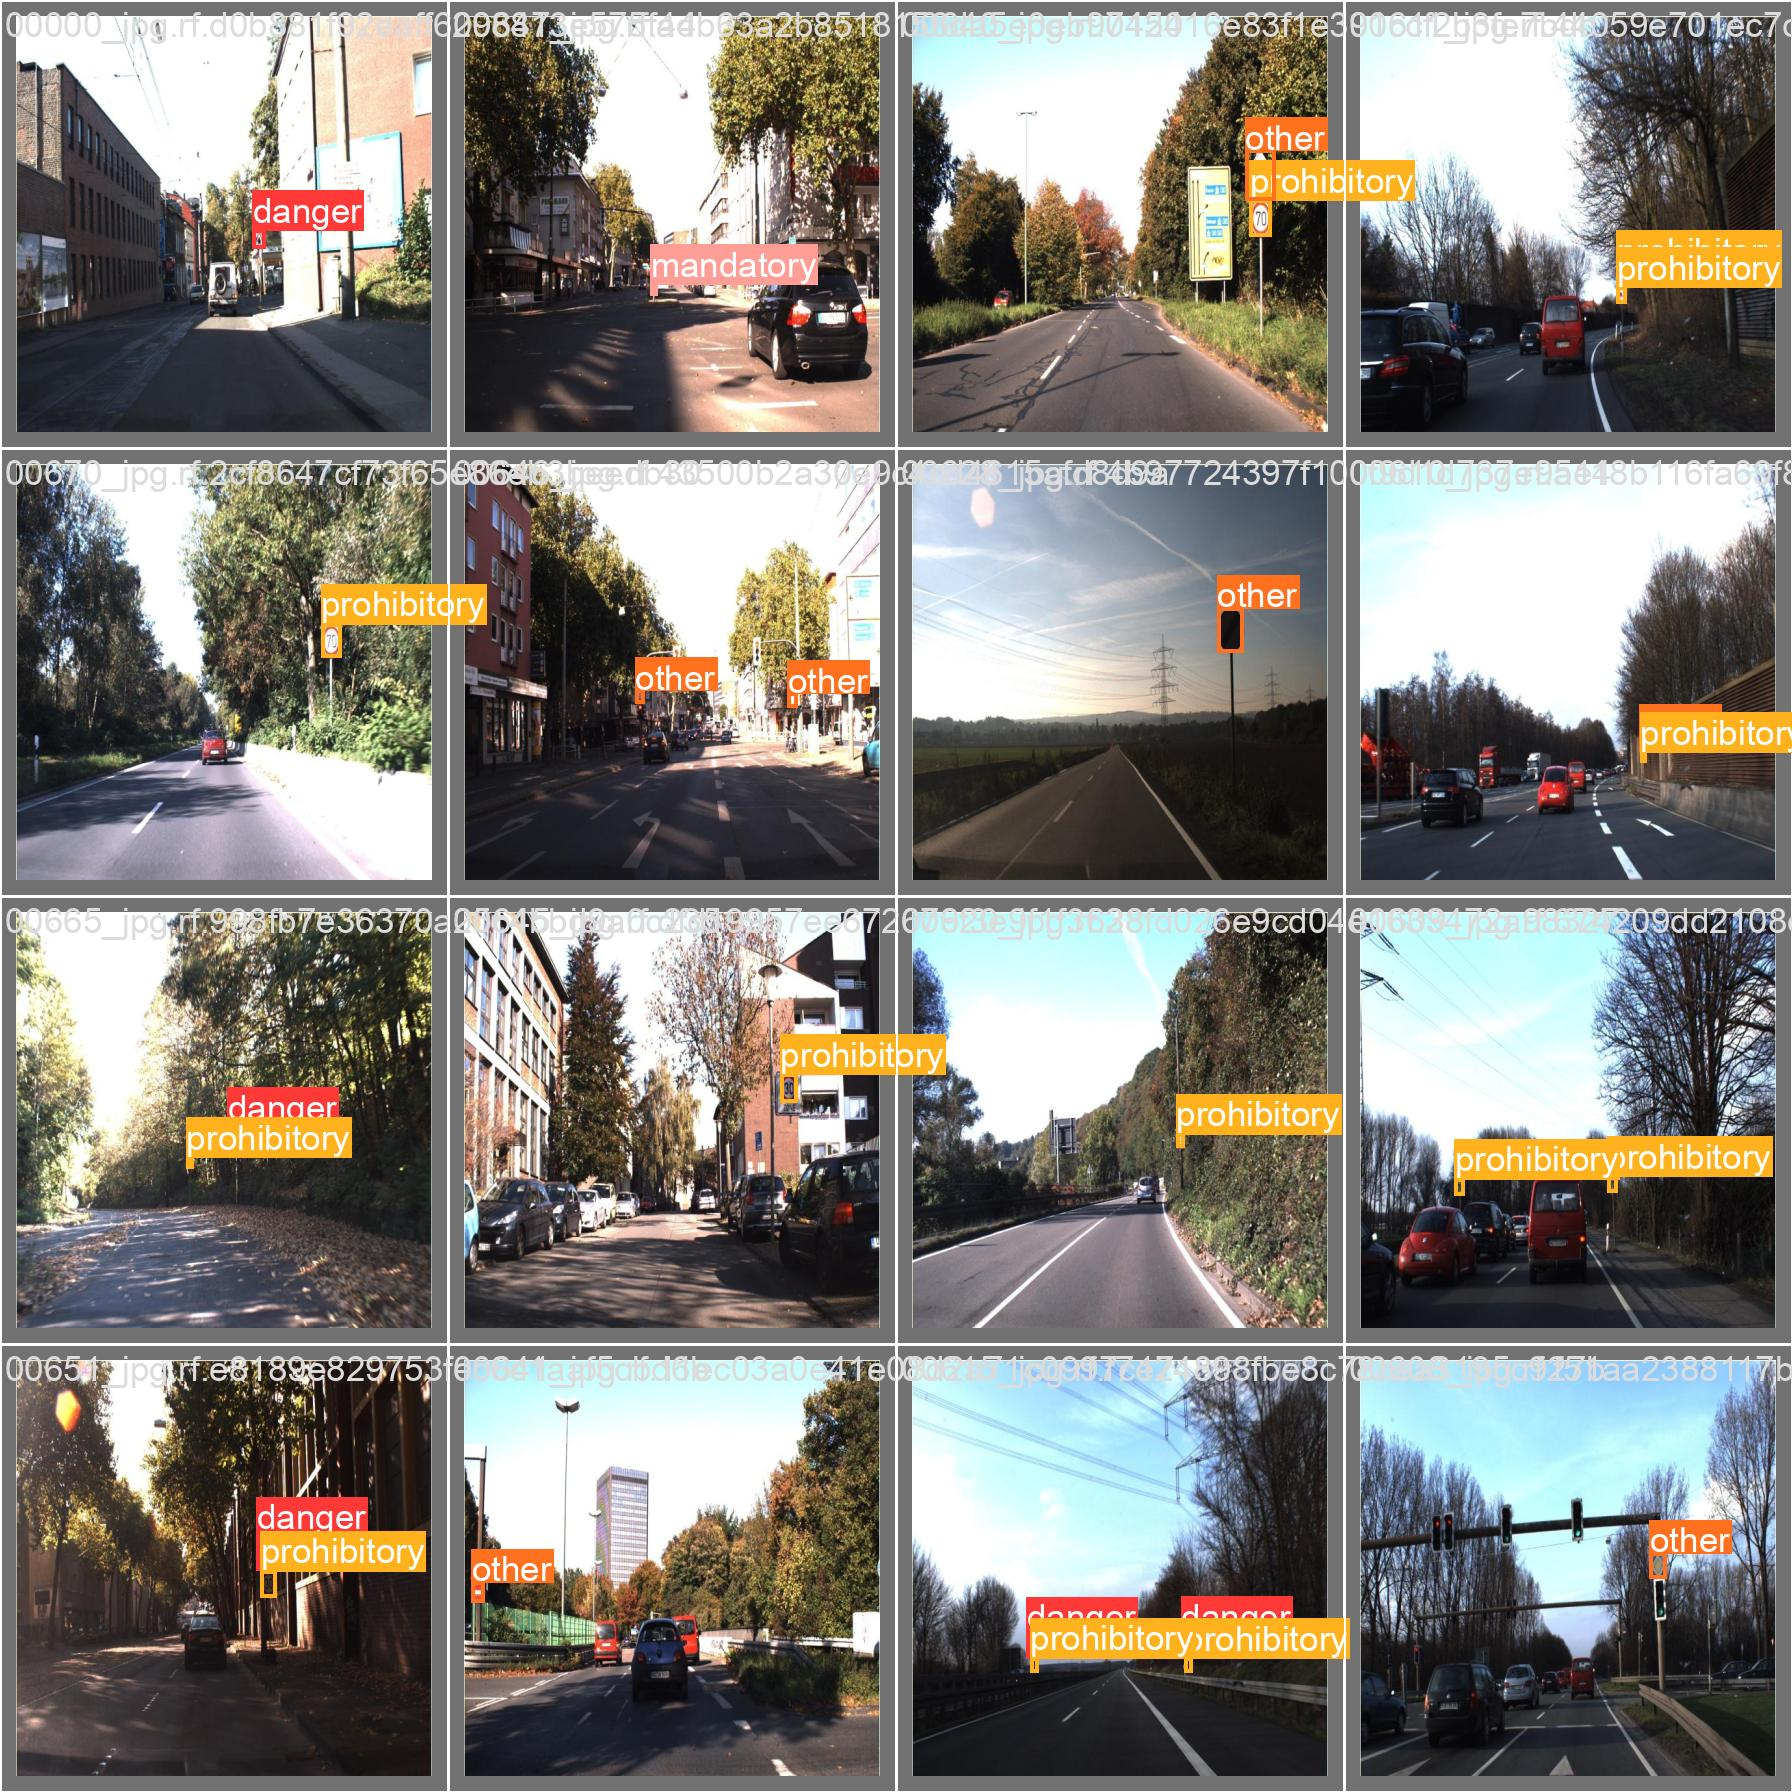

In [11]:
# first, display our ground truth data
print("GROUND TRUTH DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

Prediction DATA:


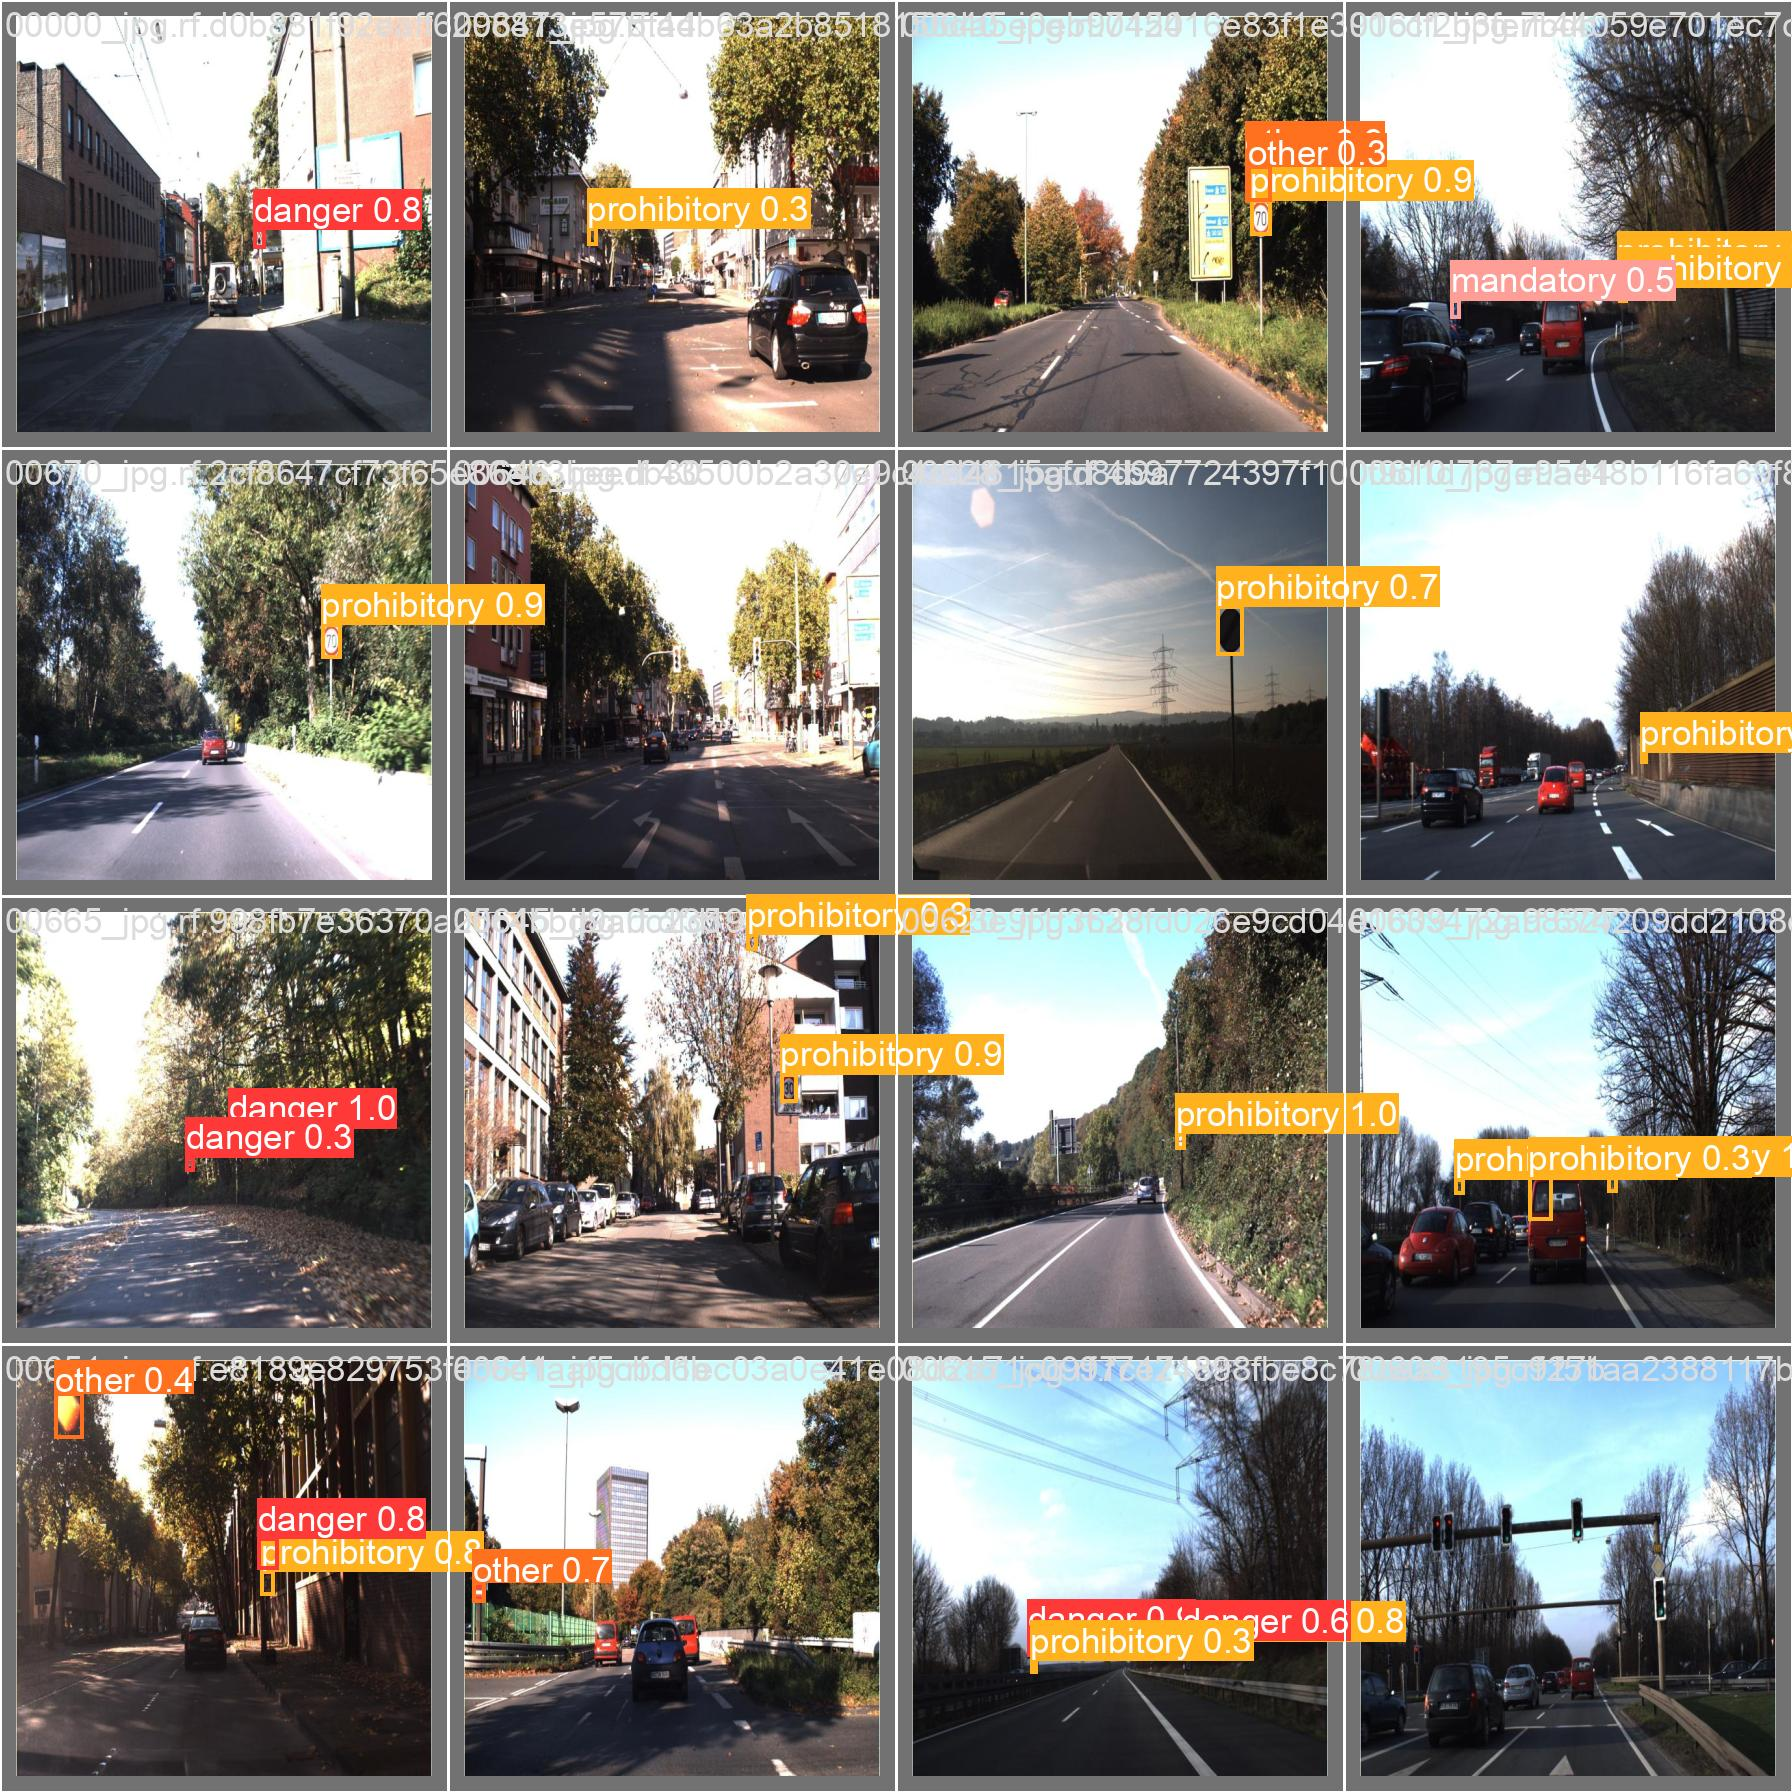

In [12]:
# second, display our prediction
print("Prediction DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_pred.jpg', width=900)

In [ ]:
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source /content/yolov5/Traffic-Sign-Detection-4/test/images

Test DATA 1:


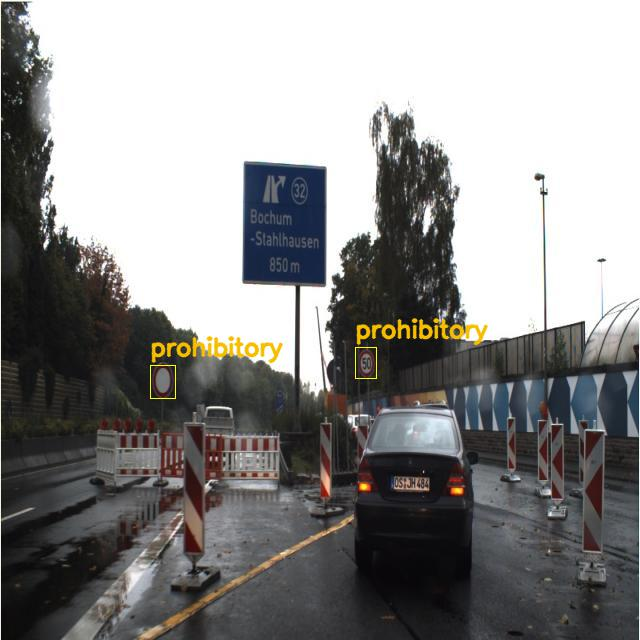

In [28]:
# now, model is tested on the test image
print("Test DATA 1:")
Image(filename='/content/00334.jpg', width=500)

Test DATA 1 Prediction:


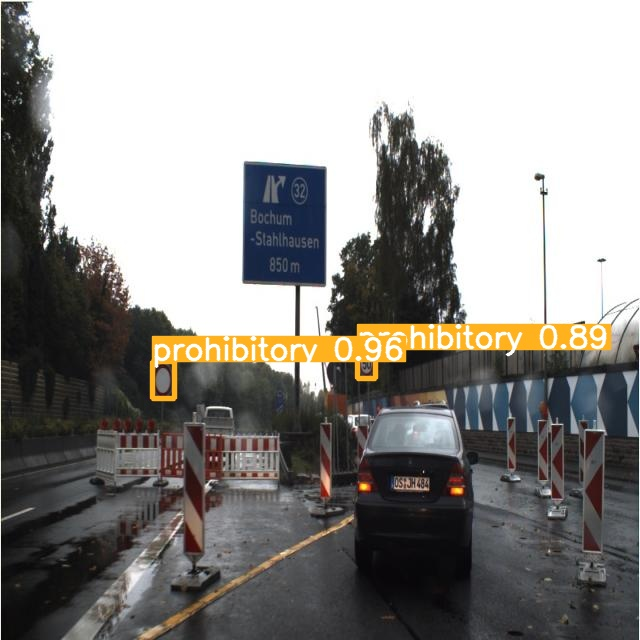

In [29]:
# now, model is tested on the test image
print("Test DATA 1 Prediction:")
Image(filename='/content/yolov5/runs/detect/exp/00334_jpg.rf.786a0d297dc84845f5c6b677fd650c5a.jpg', width=500)

Test DATA 2:


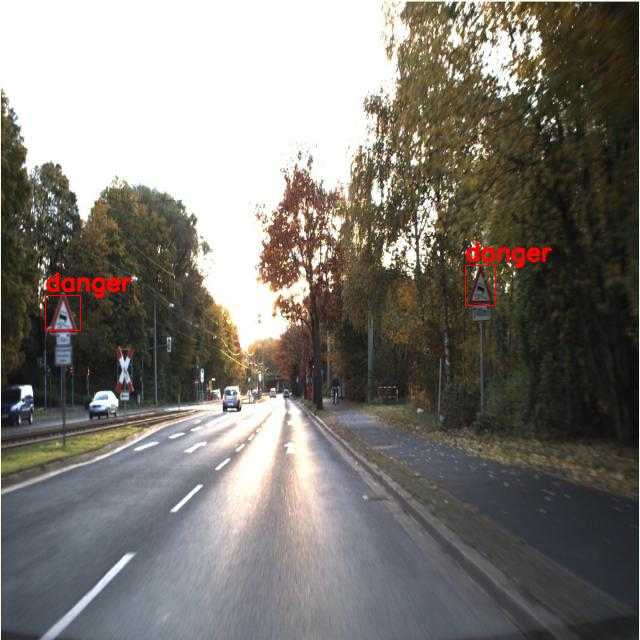

In [30]:
# now, model is tested on the test image
print("Test DATA 2:")
Image(filename='/content/00722.jpg', width=500)

Test DATA 2 Prediction:


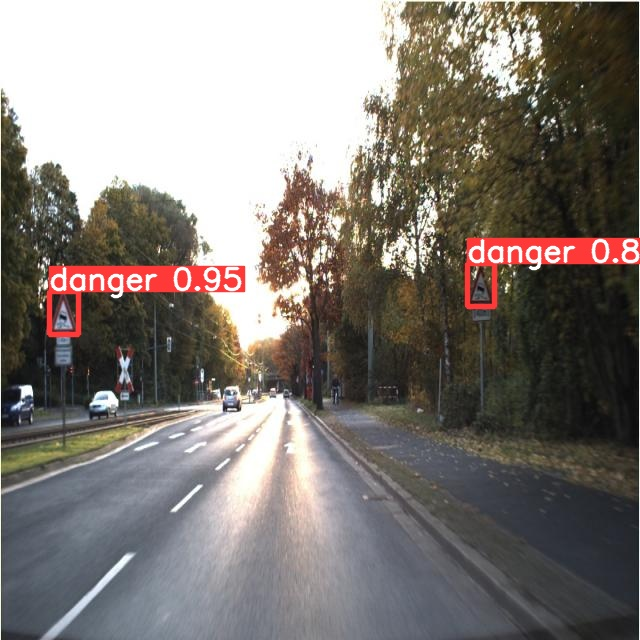

In [31]:
# another example, model being tested on the test image
print("Test DATA 2 Prediction:")
Image(filename='/content/yolov5/runs/detect/exp/00722_jpg.rf.453b1127f034ea2bfa75c02c9f19d6c8.jpg', width=500)

In [ ]:
from google.colab import files

!zip -r /content/run7_100n.zip /content/yolov5
files.download('/content/run7_100n.zip')